<a href="https://www.kaggle.com/code/bhavinmoriya/kalman-filter-kf-in-finance?scriptVersionId=115236848" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stock price smoothening

We shall use KF to smoothen the stock prices. It is very useful tool. We shall try to explore it over the course.

**Credits.** https://pyquantnews.com/. 

- Take a look at : https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as web
# from pandas_datareader import data as web
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime as dt, timedelta as td
from pykalman import KalmanFilter
sns.set()

In [2]:
end = dt.today()
start = end - td(days=5000)
df = web.get_data_stooq('goog', start=start, end=end)[['Close']]
df

,Close
Date,
2022-12-30,88.7300
2022-12-29,88.9500
2022-12-28,86.4600
2022-12-27,87.9300
2022-12-23,89.8100
...,...
2014-04-02,28.3500
2014-04-01,28.3580
2014-03-31,27.8485


### Build a smoothed average with the Kalman filter

The transition matrix tells the algorithm how the system evolves from one state to another. The observation matrix tracks the next measurement given the predicted next state. The initial mean and covariance are the initial estimates of the state and error and the covariances measure the noise in the evolution of the algorithm. In more complex examples, you can calibrate these inputs to give a better first estimate.

After you define the inputs for the Kalman filter algorithm, use it to filter the prices and find the “true” average.



In [3]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

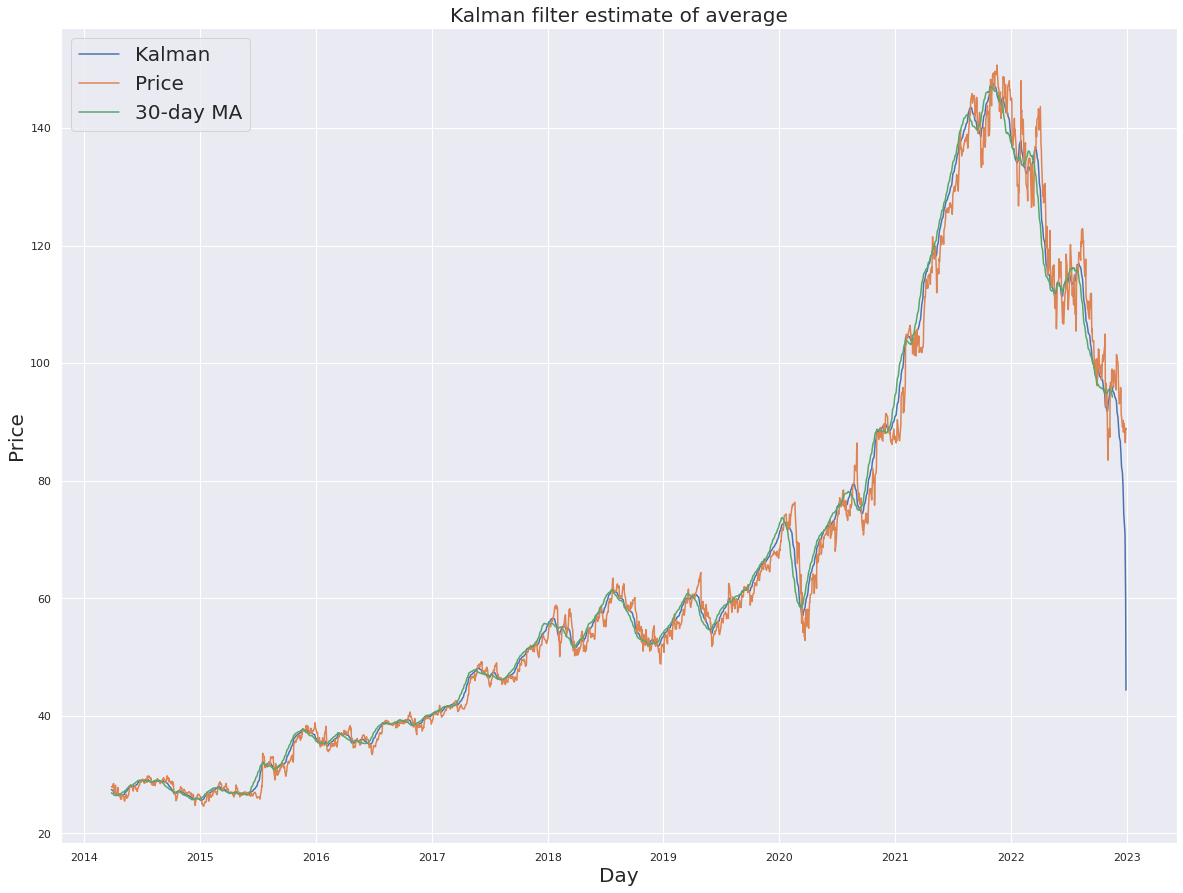

In [4]:
state_means, _ = kf.filter(df.values)
state_means = pd.Series(state_means.flatten(), index=df.index)

mean30 = df.rolling(window=30).mean()

plt.figure(figsize=(20,15))
plt.plot(state_means)
plt.plot(df)
plt.plot(mean30)
plt.title('Kalman filter estimate of average', fontsize=20)
plt.legend(['Kalman', 'Price', '30-day MA'], fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Price', fontsize=20);

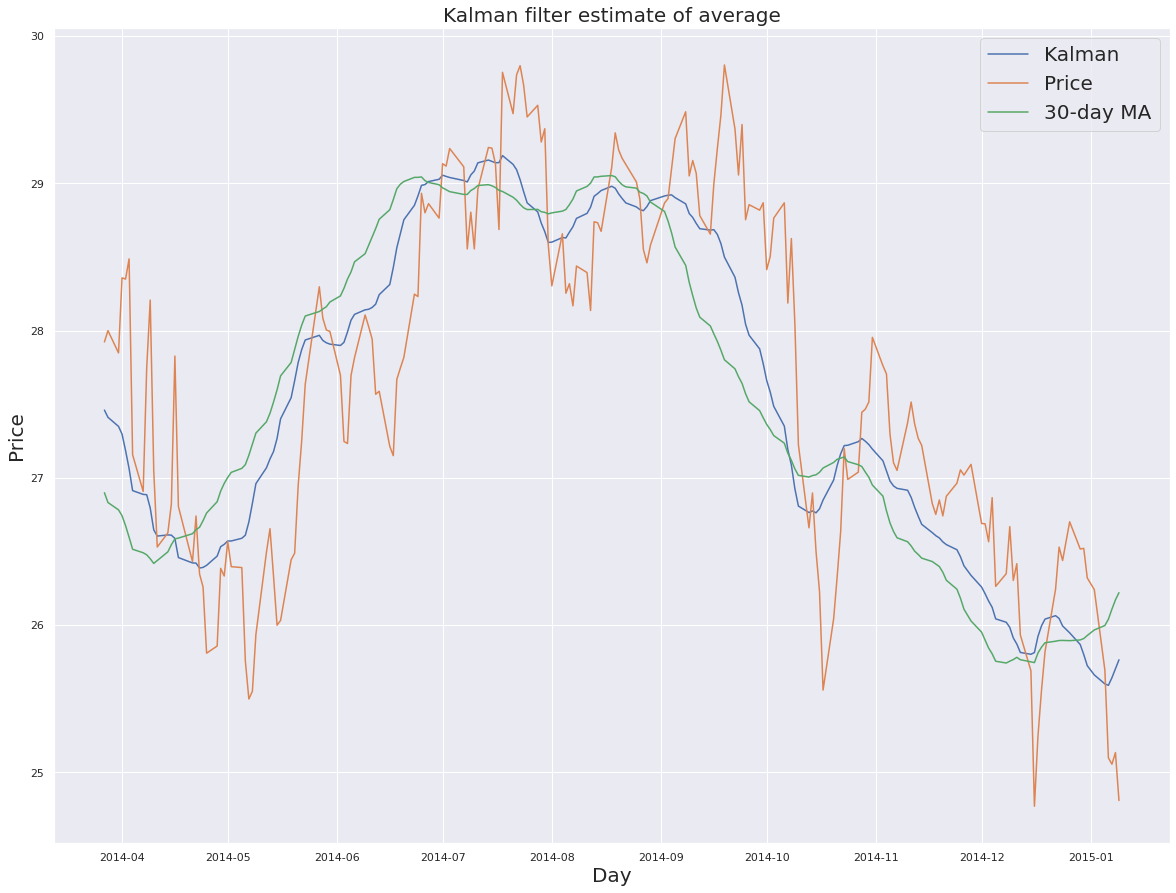

In [5]:
plt.figure(figsize=(20,15))
plt.plot(state_means[-200:])
plt.plot(df[-200:])
plt.plot(mean30[-200:])
plt.title('Kalman filter estimate of average', fontsize=20)
plt.legend(['Kalman', 'Price', '30-day MA'], fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Price', fontsize=20);